### Implement K-Nearest Neighbors algorithm on diabetes.csv dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:xlabel='Outcome', ylabel='count'>

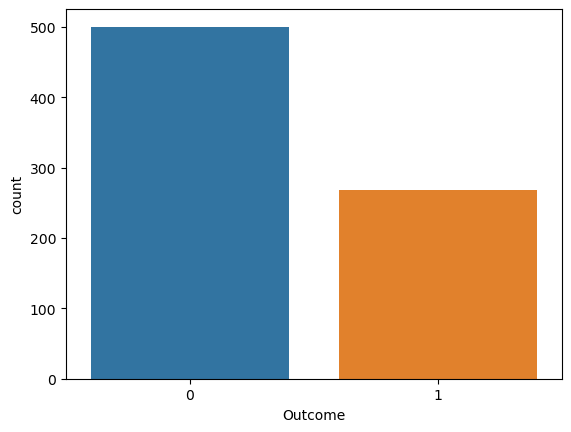

In [27]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']
sns.countplot(x=y)

In [9]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [28]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)
x.shape

(768, 8)

In [31]:
print("x_train.shape : ", x_train.shape, "\nx_test.shape : ", x_test.shape)

x_train.shape :  (537, 8) 
x_test.shape :  (231, 8)


In [17]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

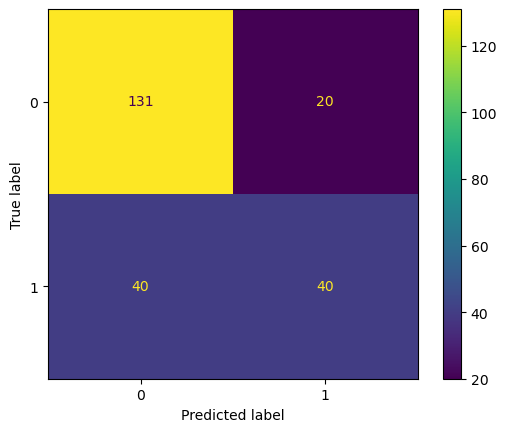

In [29]:
y_pred = knn.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       151
           1       0.54      0.49      0.51        80

    accuracy                           0.68       231
   macro avg       0.64      0.63      0.64       231
weighted avg       0.67      0.68      0.68       231



In [21]:
error = []
for k in range(1,41):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    error.append(np.mean(pred != y_test))

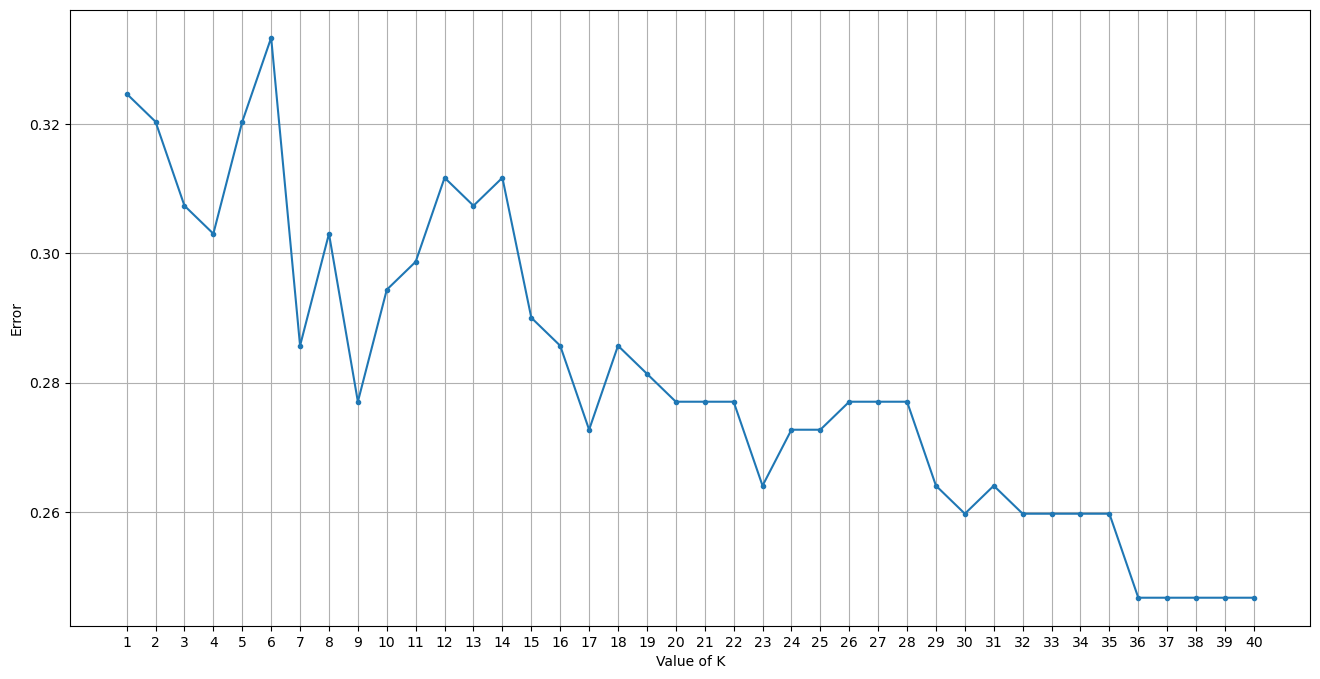

In [34]:
plt.figure(figsize = (16,8))
plt.xlabel('Value of K')
plt.ylabel('Error')
plt.grid()
plt.xticks(range(1,41))
plt.plot(range(1,41),error,marker = '.')

In [24]:
knn=KNeighborsClassifier(n_neighbors = 33)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=33)

In [25]:
y_pred = knn.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.81       151
           1       0.67      0.50      0.57        80

    accuracy                           0.74       231
   macro avg       0.72      0.68      0.69       231
weighted avg       0.73      0.74      0.73       231

